In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path= ('/content/drive/MyDrive/Colab Notebooks/CSE5317-DataMining-HW/classification_dataset_TopGenes.csv')
classification_data= pd.read_csv(path)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
classification_data = classification_data.drop('Samples', axis=1)
missing_values_count = classification_data.isnull().sum().sum()
print("missing_values_count",missing_values_count)
X = classification_data.drop('Disease State', axis=1)
y = classification_data['Disease State']

missing_values_count 0


In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((26, 44), (7, 44))

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("Accuracy: ", accuracy_svm)
print("Precision: ",precision_svm)
print("recall: ", recall_svm)
print("F1 Score: ",f1_svm)

print("The confusion Matrix: ",conf_matrix_svm)


Accuracy:  0.2857142857142857
Precision:  0.4
recall:  0.5
F1 Score:  0.4444444444444445
The confusion Matrix:  [[0 3]
 [2 2]]


Accuracy: 28.57%
Precision: 40%
Recall: 50%
F1 Score: 44.44%


Confusion Matrix:
True Negatives: 0
False Positives: 3
False Negatives: 2
True Positives: 2

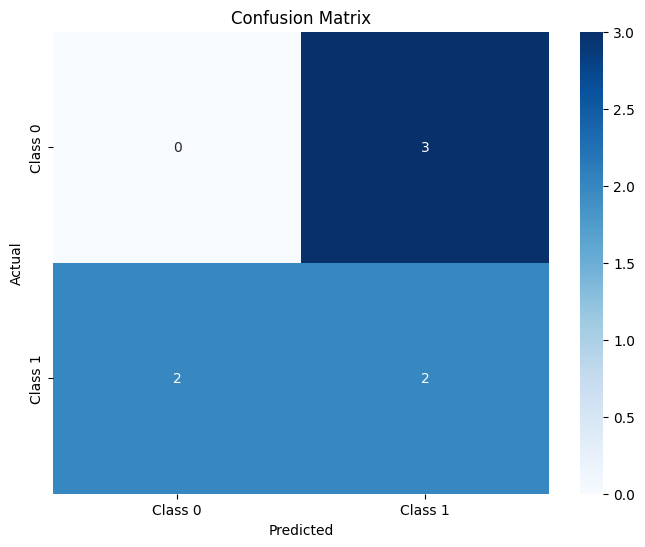

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_linear = SVC(kernel='linear')

scores = cross_val_score(svm_linear, X_scaled, y, cv=5)

print("Accuracies for each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Accuracies for each fold: [0.42857143 0.28571429 0.57142857 0.33333333 0.83333333]
Mean accuracy: 0.4904761904761904
Standard deviation: 0.19726014454483792


In [ ]:

from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5, shuffle=True, random_state=42)

precisions, recalls, f1s, accuracies = [], [], [], []
conf_matrix_sum = None

for train_index, test_index in kf.split(X_scaled):

    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    svm_linear_cv = SVC(kernel='linear', random_state=42)
    svm_linear_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = svm_linear_cv.predict(X_test_cv)

    precisions.append(precision_score(y_test_cv, y_pred_cv, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred_cv, zero_division=0))
    f1s.append(f1_score(y_test_cv, y_pred_cv, zero_division=0))
    accuracies.append(accuracy_score(y_test_cv, y_pred_cv))

    cm_fold = confusion_matrix(y_test_cv, y_pred_cv)

    if conf_matrix_sum is None:
        conf_matrix_sum = cm_fold
    else:
        conf_matrix_sum += cm_fold

avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1s)
avg_accuracy = np.mean(accuracies)

avg_precision, avg_recall, avg_f1, avg_accuracy, conf_matrix_sum


(0.8333333333333333,
 0.85,
 0.8342857142857143,
 0.8,
 array([[13,  4],
        [ 3, 13]]))

<ipython-input-10-3436d0d7eaa9>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Negative', 'Positive'])
<ipython-input-10-3436d0d7eaa9>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Negative', 'Positive'])


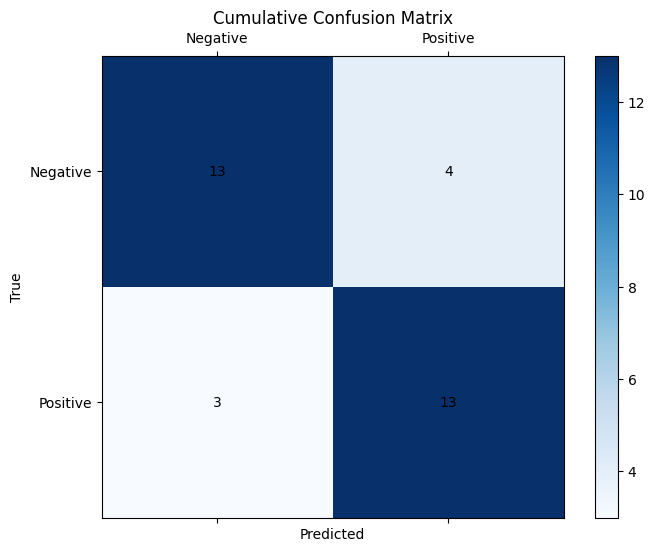

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

kf = KFold(n_splits=5, shuffle=True, random_state=42)

precisions, recalls, f1s, accuracies = [], [], [], []
conf_matrix_sum = None

for train_index, test_index in kf.split(X_scaled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    svm_linear_cv = SVC(kernel='linear', random_state=42)
    svm_linear_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = svm_linear_cv.predict(X_test_cv)

    precisions.append(precision_score(y_test_cv, y_pred_cv, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred_cv, zero_division=0))
    f1s.append(f1_score(y_test_cv, y_pred_cv, zero_division=0))
    accuracies.append(accuracy_score(y_test_cv, y_pred_cv))

    cm_fold = confusion_matrix(y_test_cv, y_pred_cv)

    if conf_matrix_sum is None:
        conf_matrix_sum = cm_fold
    else:
        conf_matrix_sum += cm_fold

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix_sum, cmap=plt.cm.Blues)
fig.colorbar(cax)

plt.title('Cumulative Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])

for (i, j), val in np.ndenumerate(conf_matrix_sum):
    plt.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.show()

In [ ]:

from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5, shuffle=True, random_state=42)

precisions, recalls, f1s, accuracies = [], [], [], []
conf_matrix_sum = None

for train_index, test_index in kf.split(X_scaled):

    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    svm_linear_cv = SVC(kernel='poly',degree=2, random_state=42)
    svm_linear_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = svm_linear_cv.predict(X_test_cv)

    precisions.append(precision_score(y_test_cv, y_pred_cv, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred_cv, zero_division=0))
    f1s.append(f1_score(y_test_cv, y_pred_cv, zero_division=0))
    accuracies.append(accuracy_score(y_test_cv, y_pred_cv))

    cm_fold = confusion_matrix(y_test_cv, y_pred_cv)

    if conf_matrix_sum is None:
        conf_matrix_sum = cm_fold
    else:
        conf_matrix_sum += cm_fold

avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1s)
avg_accuracy = np.mean(accuracies)

avg_precision, avg_recall, avg_f1, avg_accuracy, conf_matrix_sum

(0.6,
 0.55,
 0.5447619047619048,
 0.5761904761904761,
 array([[11,  6],
        [ 8,  8]]))

#Kernel Comparison

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

svm_configurations = {
    "Linear": {'kernel': 'linear'},
    "RBF": {'kernel': 'rbf'},
    "Poly Degree 2": {'kernel': 'poly', 'degree': 2},
    "Poly Degree 5": {'kernel': 'poly', 'degree': 5},
    "Poly Degree 8": {'kernel': 'poly', 'degree': 8},
    "Sigmoid": {'kernel':'sigmoid'},
    "Linear Gamma=Auto": {'kernel':'linear', 'gamma':'auto'},
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

average_accuracies = {}

for config_name, params in svm_configurations.items():
    accuracies = []
    for train_index, test_index in kf.split(X_scaled):
        X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        svm_model = SVC(**params, random_state=42)
        svm_model.fit(X_train_cv, y_train_cv)

        y_pred_cv = svm_model.predict(X_test_cv)
        accuracies.append(accuracy_score(y_test_cv, y_pred_cv))

    average_accuracies[config_name] = np.mean(accuracies)

average_accuracies

{'Linear': 0.8,
 'RBF': 0.4619047619047619,
 'Poly Degree 2': 0.5761904761904761,
 'Poly Degree 5': 0.3952380952380952,
 'Poly Degree 8': 0.5095238095238096,
 'Sigmoid': 0.3380952380952381,
 'Linear Gamma=Auto': 0.8}

In [ ]:

svm_configurations = {
    "Linear": {'kernel': 'linear'},
    "RBF": {'kernel': 'rbf'},
    "Poly Degree 2": {'kernel': 'poly', 'degree': 2},
    "Poly Degree 5": {'kernel': 'poly', 'degree': 5},
    "Poly Degree 8": {'kernel': 'poly', 'degree': 8},
    "Sigmoid": {'kernel': 'sigmoid'},
    "Linear Gamma=Auto": {'kernel': 'linear', 'gamma': 'auto'},
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies_for_each_fold = {}

for config_name, params in svm_configurations.items():
    fold_accuracies = []

    for train_index, test_index in kf.split(X_scaled):
        X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        svm_model = SVC(**params, random_state=42)
        svm_model.fit(X_train_cv, y_train_cv)

        y_pred_cv = svm_model.predict(X_test_cv)
        fold_accuracies.append(accuracy_score(y_test_cv, y_pred_cv))

    accuracies_for_each_fold[config_name] = fold_accuracies

for config, accuracies in accuracies_for_each_fold.items():
    print(f"Configuration: {config}")
    for i, acc in enumerate(accuracies, start=1):
        print(f" Fold {i}: {acc*100:.2f}%")
    print(f" Mean Accuracy: {np.mean(accuracies)*100:.2f}%")
    print()

Configuration: Linear
 Fold 1: 42.86%
 Fold 2: 100.00%
 Fold 3: 57.14%
 Fold 4: 100.00%
 Fold 5: 100.00%
 Mean Accuracy: 80.00%

Configuration: RBF
 Fold 1: 28.57%
 Fold 2: 57.14%
 Fold 3: 28.57%
 Fold 4: 50.00%
 Fold 5: 66.67%
 Mean Accuracy: 46.19%

Configuration: Poly Degree 2
 Fold 1: 28.57%
 Fold 2: 85.71%
 Fold 3: 57.14%
 Fold 4: 66.67%
 Fold 5: 50.00%
 Mean Accuracy: 57.62%

Configuration: Poly Degree 5
 Fold 1: 14.29%
 Fold 2: 71.43%
 Fold 3: 28.57%
 Fold 4: 50.00%
 Fold 5: 33.33%
 Mean Accuracy: 39.52%

Configuration: Poly Degree 8
 Fold 1: 71.43%
 Fold 2: 57.14%
 Fold 3: 42.86%
 Fold 4: 50.00%
 Fold 5: 33.33%
 Mean Accuracy: 50.95%

Configuration: Sigmoid
 Fold 1: 28.57%
 Fold 2: 28.57%
 Fold 3: 28.57%
 Fold 4: 33.33%
 Fold 5: 50.00%
 Mean Accuracy: 33.81%

Configuration: Linear Gamma=Auto
 Fold 1: 42.86%
 Fold 2: 100.00%
 Fold 3: 57.14%
 Fold 4: 100.00%
 Fold 5: 100.00%
 Mean Accuracy: 80.00%



In [ ]:

svm_configurations = {
    "Linear": {'kernel': 'linear'},
    "RBF": {'kernel': 'rbf'},
    "Poly Degree 2": {'kernel': 'poly', 'degree': 2},
    "Poly Degree 5": {'kernel': 'poly', 'degree': 5},
    "Poly Degree 8": {'kernel': 'poly', 'degree': 8},
    "Sigmoid": {'kernel': 'sigmoid'},
    "Linear Gamma=Auto": {'kernel': 'linear', 'gamma': 'auto'},

}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies_for_each_fold = {}

for config_name, params in svm_configurations.items():
    fold_accuracies = []

    for train_index, test_index in kf.split(X_scaled):

        X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        svm_model = SVC(**params, random_state=42)
        svm_model.fit(X_train_cv, y_train_cv)

        y_pred_cv = svm_model.predict(X_test_cv)
        fold_accuracies.append(accuracy_score(y_test_cv, y_pred_cv))

    accuracies_for_each_fold[config_name] = fold_accuracies

for config, accuracies in accuracies_for_each_fold.items():
    print(f"Configuration: {config}")
    for i, acc in enumerate(accuracies, start=1):
        print(f" Fold {i}: {acc*100:.2f}%")
    print(f" Mean Accuracy: {np.mean(accuracies)*100:.2f}%")
    print()

Configuration: Linear
 Fold 1: 25.00%
 Fold 2: 75.00%
 Fold 3: 75.00%
 Fold 4: 66.67%
 Fold 5: 66.67%
 Fold 6: 33.33%
 Fold 7: 100.00%
 Fold 8: 100.00%
 Fold 9: 100.00%
 Fold 10: 66.67%
 Mean Accuracy: 70.83%

Configuration: RBF
 Fold 1: 25.00%
 Fold 2: 25.00%
 Fold 3: 25.00%
 Fold 4: 66.67%
 Fold 5: 33.33%
 Fold 6: 0.00%
 Fold 7: 66.67%
 Fold 8: 66.67%
 Fold 9: 66.67%
 Fold 10: 66.67%
 Mean Accuracy: 44.17%

Configuration: Poly Degree 2
 Fold 1: 75.00%
 Fold 2: 50.00%
 Fold 3: 75.00%
 Fold 4: 66.67%
 Fold 5: 100.00%
 Fold 6: 33.33%
 Fold 7: 66.67%
 Fold 8: 66.67%
 Fold 9: 33.33%
 Fold 10: 66.67%
 Mean Accuracy: 63.33%

Configuration: Poly Degree 5
 Fold 1: 25.00%
 Fold 2: 50.00%
 Fold 3: 50.00%
 Fold 4: 66.67%
 Fold 5: 33.33%
 Fold 6: 0.00%
 Fold 7: 66.67%
 Fold 8: 66.67%
 Fold 9: 33.33%
 Fold 10: 66.67%
 Mean Accuracy: 45.83%

Configuration: Poly Degree 8
 Fold 1: 50.00%
 Fold 2: 100.00%
 Fold 3: 75.00%
 Fold 4: 66.67%
 Fold 5: 66.67%
 Fold 6: 0.00%
 Fold 7: 33.33%
 Fold 8: 66.67%
 F

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

kf = KFold(n_splits=10, shuffle=True, random_state=42)

overall_metrics = {}

for config_name, params in svm_configurations.items():
    total_conf_matrix = np.zeros((2, 2))
    total_accuracy, total_precision, total_recall, total_f1 = 0, 0, 0, 0

    for train_index, test_index in kf.split(X_scaled):

        X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        svm_model = SVC(**params, random_state=42)
        svm_model.fit(X_train_cv, y_train_cv)

        y_pred_cv = svm_model.predict(X_test_cv)
        total_accuracy += accuracy_score(y_test_cv, y_pred_cv)
        total_precision += precision_score(y_test_cv, y_pred_cv, zero_division=0)
        total_recall += recall_score(y_test_cv, y_pred_cv, zero_division=0)
        total_f1 += f1_score(y_test_cv, y_pred_cv, zero_division=0)
        total_conf_matrix += confusion_matrix(y_test_cv, y_pred_cv)

    num_folds = kf.get_n_splits()
    overall_metrics[config_name] = {
        'Mean Accuracy': total_accuracy / num_folds,
        'Mean Precision': total_precision / num_folds,
        'Mean Recall': total_recall / num_folds,
        'Mean F1 Score': total_f1 / num_folds,
        'Overall Confusion Matrix': total_conf_matrix
    }

for config, metrics in overall_metrics.items():
    print(f"Configuration: {config}")
    print(f" Mean Accuracy: {metrics['Mean Accuracy']*100:.2f}%")
    print(f" Mean Precision: {metrics['Mean Precision']*100:.2f}%")
    print(f" Mean Recall: {metrics['Mean Recall']*100:.2f}%")
    print(f" Mean F1 Score: {metrics['Mean F1 Score']*100:.2f}%")
    print(" Overall Confusion Matrix:")
    print(metrics['Overall Confusion Matrix'])
    print()

Configuration: Linear
 Mean Accuracy: 70.83%
 Mean Precision: 60.00%
 Mean Recall: 68.33%
 Mean F1 Score: 60.33%
 Overall Confusion Matrix:
[[12.  5.]
 [ 5. 11.]]

Configuration: RBF
 Mean Accuracy: 44.17%
 Mean Precision: 39.17%
 Mean Recall: 55.00%
 Mean F1 Score: 39.67%
 Overall Confusion Matrix:
[[ 7. 10.]
 [ 9.  7.]]

Configuration: Poly Degree 2
 Mean Accuracy: 63.33%
 Mean Precision: 65.00%
 Mean Recall: 58.33%
 Mean F1 Score: 55.00%
 Overall Confusion Matrix:
[[13.  4.]
 [ 8.  8.]]

Configuration: Poly Degree 5
 Mean Accuracy: 45.83%
 Mean Precision: 28.33%
 Mean Recall: 25.00%
 Mean F1 Score: 23.33%
 Overall Confusion Matrix:
[[11.  6.]
 [12.  4.]]

Configuration: Poly Degree 8
 Mean Accuracy: 59.17%
 Mean Precision: 25.00%
 Mean Recall: 25.00%
 Mean F1 Score: 23.33%
 Overall Confusion Matrix:
[[16.  1.]
 [12.  4.]]

Configuration: Sigmoid
 Mean Accuracy: 38.33%
 Mean Precision: 29.17%
 Mean Recall: 50.00%
 Mean F1 Score: 33.00%
 Overall Confusion Matrix:
[[ 6. 11.]
 [10.  6.]

In [ ]:
import plotly.graph_objects as go

configs = list(average_accuracies.keys())
acc_values = [val * 100 for val in average_accuracies.values()]  # Convert to percentages

bar_chart = go.Figure([go.Bar(x=configs, y=acc_values)])
bar_chart.update_layout(title='SVM Configuration Accuracies - Bar Chart',
                        xaxis_title='SVM Configurations',
                        yaxis_title='Accuracy (%)',
                        xaxis_tickangle=-45,
                        yaxis=dict(range=[0, 100]),
                        width=800,  # Width of the plot in pixels
                        height=600)  # Height of the plot in pixels
bar_chart.show()

line_chart = go.Figure([go.Scatter(x=configs, y=acc_values, mode='lines+markers')])
line_chart.update_layout(title='SVM Configuration Accuracies - Line Chart',
                         xaxis_title='SVM Configurations',
                         yaxis_title='Accuracy (%)',
                         xaxis_tickangle=-45,
                         yaxis=dict(range=[0, 100]),
                         width=800,  # Width of the plot in pixels
                         height=600)  # Height of the plot in pixels
line_chart.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

svm_configurations = {
    "Linear": {'kernel': 'linear'},
    "RBF": {'kernel': 'rbf'},
    "Poly Degree 2": {'kernel': 'poly', 'degree': 2},
    "Poly Degree 5": {'kernel': 'poly', 'degree': 5},
    "Poly Degree 8": {'kernel': 'poly', 'degree': 8},
    "Sigmoid": {'kernel': 'sigmoid'},
    "Linear Gamma=Auto": {'kernel': 'linear', 'gamma': 'auto'},
}

kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

average_accuracies_5_fold = {}
average_accuracies_10_fold = {}

def perform_cv(kf, svm_configurations, X_scaled, y):
    accuracies = {}
    for config_name, params in svm_configurations.items():
        fold_accuracies = []
        for train_index, test_index in kf.split(X_scaled):
            X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
            y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

            svm_model = SVC(**params, random_state=42)
            svm_model.fit(X_train_cv, y_train_cv)

            y_pred_cv = svm_model.predict(X_test_cv)
            fold_accuracies.append(accuracy_score(y_test_cv, y_pred_cv))

        accuracies[config_name] = np.mean(fold_accuracies)
    return accuracies

average_accuracies_5_fold = perform_cv(kf_5, svm_configurations, X_scaled, y)
average_accuracies_10_fold = perform_cv(kf_10, svm_configurations, X_scaled, y)

print("5-Fold Accuracies:", average_accuracies_5_fold)
print("10-Fold Accuracies:", average_accuracies_10_fold)

5-Fold Accuracies: {'Linear': 0.8, 'RBF': 0.4619047619047619, 'Poly Degree 2': 0.5761904761904761, 'Poly Degree 5': 0.3952380952380952, 'Poly Degree 8': 0.5095238095238096, 'Sigmoid': 0.3380952380952381, 'Linear Gamma=Auto': 0.8}
10-Fold Accuracies: {'Linear': 0.7083333333333333, 'RBF': 0.4416666666666666, 'Poly Degree 2': 0.6333333333333333, 'Poly Degree 5': 0.4583333333333333, 'Poly Degree 8': 0.5916666666666667, 'Sigmoid': 0.3833333333333333, 'Linear Gamma=Auto': 0.7083333333333333}


In [ ]:
import plotly.graph_objects as go

configs = list(average_accuracies_5_fold.keys())
acc_values_5_fold = [val * 100 for val in average_accuracies_5_fold.values()]
acc_values_10_fold = [val * 100 for val in average_accuracies_10_fold.values()]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=configs,
    y=acc_values_5_fold,
    name='5-Fold CV',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=configs,
    y=acc_values_10_fold,
    name='10-Fold CV',
    marker_color='lightblue'
))

fig.update_layout(
    title='SVM Configuration Accuracies - 5-Fold(Long Fold) vs 10-Fold(Small Fold) CV',
    xaxis_title='SVM Configurations',
    yaxis_title='Accuracy (%)',
    xaxis_tickangle=-45,
    yaxis=dict(range=[0, 100]),
    barmode='group',
    width=800,
    height=600
)

fig.show()